# <font color = 'red'>Clustering algorithme</font>

In [ ]:
!pip install kmodes

In [27]:
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Upload the data

In [28]:
from google.colab import files
uploaded = files.upload()

Saving Book1.xlsx to Book1 (2).xlsx


In [29]:
import pandas as pd
data = pd.read_excel('Book1.xlsx', index_col=0, header=0)
data.head()

,Num_REMORQUE,Num_Client,Date_entree,Heure_entree,Date_sortie,Heure_sortie,Poids_charge,Poids_vide,Pont_entree,pont_Sortie,Produit
Num_Vehicule,,,,,,,,,,,
Vehicule1,Remorque1,Client1,2020-01-02,08:48,2020-01-02,06:58,43220,15760,14,14,TRTX DE SOJA
Vehicule2,Remorque2,Client1,2020-01-02,08:47,2020-01-02,07:00,42460,16480,17,17,PULPE DE BETTRAVE
Vehicule3,Remorque3,Client1,2020-01-02,11:17,2020-01-02,07:02,42940,16600,17,17,PULPE DE BETTRAVE
Vehicule4,Remorque4,Client1,2020-01-02,08:46,2020-01-02,07:03,42560,14700,14,14,TRTX DE SOJA
Vehicule5,Remorque5,Client1,2020-01-02,10:05,2020-01-02,07:03,42020,16300,17,17,PULPE DE BETTRAVE


# Data preprocessing

In [30]:
def time(row):
    return datetime.strptime(row, '%H:%M')

def minutes(row):
    return row.total_seconds() / (60*60)
data['date_diff_hour'] = (data['Date_entree'] - data['Date_sortie'] + data['Heure_entree'].apply(time) - data['Heure_sortie'].apply(time)).apply(minutes)

In [31]:
def covid(row):
    if row < datetime.strptime('2020/03/16', '%Y/%m/%d'):
        return 'Avant_covid'
    else :
        return 'Pendant_covid'
data['Covid'] = data['Date_sortie'].apply(covid)


In [32]:
def time(row):
    if datetime.strptime(row, '%H:%M') <= datetime.strptime('12:00', '%H:%M'):
        return 'Matin'
    elif datetime.strptime(row, '%H:%M') > datetime.strptime('12:00', '%H:%M') and datetime.strptime(row, '%H:%M') <= datetime.strptime('18:00', '%H:%M') : 
        return 'Apres-midi'
    elif datetime.strptime(row, '%H:%M') > datetime.strptime('18:00', '%H:%M'): 
        return 'Nuit'
data['Heure_entree'] = data['Heure_entree'].apply(time)
data['Heure_sortie'] = data['Heure_sortie'].apply(time)

In [33]:
data = data.drop(['Date_entree','Date_sortie','Num_REMORQUE'],axis = 1)

In [34]:
scaler = MinMaxScaler()
data[['Poids_charge',	'Poids_vide','date_diff_hour']] = scaler.fit_transform(data[['Poids_charge',	'Poids_vide','date_diff_hour']])

# Final state of the data

In [35]:
data.head()

,Num_Client,Heure_entree,Heure_sortie,Poids_charge,Poids_vide,Pont_entree,pont_Sortie,Produit,date_diff_hour,Covid
Num_Vehicule,,,,,,,,,,
Vehicule1,Client1,Matin,Matin,0.954217,0.427313,14,14,TRTX DE SOJA,0.149758,Avant_covid
Vehicule2,Client1,Matin,Matin,0.908434,0.585903,17,17,PULPE DE BETTRAVE,0.142512,Avant_covid
Vehicule3,Client1,Matin,Matin,0.937349,0.612335,17,17,PULPE DE BETTRAVE,0.500000,Avant_covid
Vehicule4,Client1,Matin,Matin,0.914458,0.193833,14,14,TRTX DE SOJA,0.132850,Avant_covid
Vehicule5,Client1,Matin,Matin,0.881928,0.546256,17,17,PULPE DE BETTRAVE,0.323671,Avant_covid


In [36]:
data_values = data.values
data_values[:,3] = data_values[:,3].astype(float) 
data_values[:,4] = data_values[:,4].astype(float) 
data_values[:,8] = data_values[:,8].astype(float) 

# Finding the optimum value for the number of clusters (k) using the elbow method

In [37]:
Cost_proto = []
for i in range(1,11):
  kproto = KPrototypes(n_clusters=i,max_iter=20,verbose=0).fit(data_values, categorical = [0,1,2,5,6,7,9])
  Cost_proto.append(kproto.cost_)

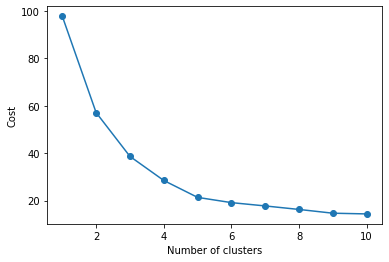

In [38]:
plt.plot(range(1,11), Cost_proto, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

# We choose k =5

In [39]:
kproto = KPrototypes(n_clusters=5,max_iter=200,verbose=0)
clusters = kproto.fit_predict(data_values, categorical = [0,1,2,5,6,7,9])

# Result

In [40]:
data['clusters'] = clusters
data.head()

,Num_Client,Heure_entree,Heure_sortie,Poids_charge,Poids_vide,Pont_entree,pont_Sortie,Produit,date_diff_hour,Covid,clusters
Num_Vehicule,,,,,,,,,,,
Vehicule1,Client1,Matin,Matin,0.954217,0.427313,14,14,TRTX DE SOJA,0.149758,Avant_covid,4
Vehicule2,Client1,Matin,Matin,0.908434,0.585903,17,17,PULPE DE BETTRAVE,0.142512,Avant_covid,0
Vehicule3,Client1,Matin,Matin,0.937349,0.612335,17,17,PULPE DE BETTRAVE,0.500000,Avant_covid,0
Vehicule4,Client1,Matin,Matin,0.914458,0.193833,14,14,TRTX DE SOJA,0.132850,Avant_covid,4
Vehicule5,Client1,Matin,Matin,0.881928,0.546256,17,17,PULPE DE BETTRAVE,0.323671,Avant_covid,0


# Comparison with the k-means method that uses only numerical data

# Finding the optimum value for the number of clusters (k) using the elbow method

In [41]:
X = data[['Poids_charge',	'Poids_vide','date_diff_hour']].values
cost = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i).fit(X)
  cost.append(kmeans.inertia_)

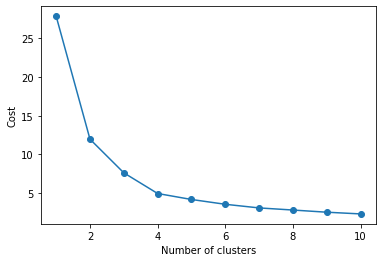

In [42]:
plt.plot(range(1,11), cost, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.show()

# We choose k = 4

In [43]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

In [44]:
data['clusters'] = clusters
data.head()

,Num_Client,Heure_entree,Heure_sortie,Poids_charge,Poids_vide,Pont_entree,pont_Sortie,Produit,date_diff_hour,Covid,clusters
Num_Vehicule,,,,,,,,,,,
Vehicule1,Client1,Matin,Matin,0.954217,0.427313,14,14,TRTX DE SOJA,0.149758,Avant_covid,3
Vehicule2,Client1,Matin,Matin,0.908434,0.585903,17,17,PULPE DE BETTRAVE,0.142512,Avant_covid,3
Vehicule3,Client1,Matin,Matin,0.937349,0.612335,17,17,PULPE DE BETTRAVE,0.500000,Avant_covid,0
Vehicule4,Client1,Matin,Matin,0.914458,0.193833,14,14,TRTX DE SOJA,0.132850,Avant_covid,3
Vehicule5,Client1,Matin,Matin,0.881928,0.546256,17,17,PULPE DE BETTRAVE,0.323671,Avant_covid,3
